In [2]:
from services.main_service import get_coin_data
from services.neuralprophet_service import get_evaluations, train_model
import pandas as pd
import matplotlib.pylab as plt
from neuralprophet import NeuralProphet

SELECTED_COINS = ["ADA-GBP", "BAT-GBP", "BCH-GBP", "BNB-GBP"]

Using the cached dataset..


2024-04-10 13:27:50.282 
  command:

    streamlit run c:\Users\nisha\anaconda3\envs\com724\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
WARNING - (py.warnings._showwarnmsg) - c:\Users\nisha\anaconda3\envs\com724\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.727% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nisha\anaconda3\envs\com724\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nisha\anaconda3\envs\com724\Lib\site-packages\

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 35.35it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


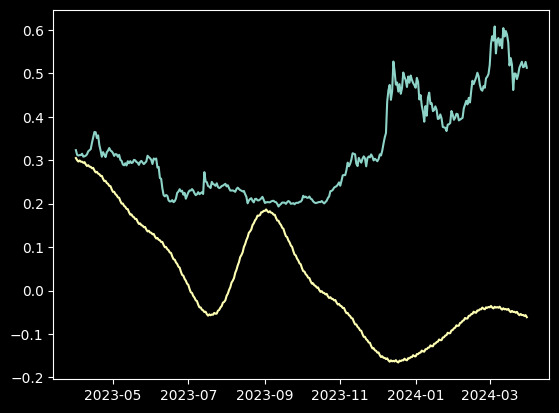

In [3]:
coin_data_df = get_coin_data(SELECTED_COINS)
# coin_data_df = coin_data_df.iloc[] # select last year data
selected_coin = "ADA-GBP"

temp_dataset_df = coin_data_df[selected_coin]
temp_dataset_df = temp_dataset_df.reset_index()
temp_dataset_df.columns = ["ds", "y"]

prediction, test_data = train_model(coin_data_df, selected_coin)

plot_prediction = pd.DataFrame({"y": prediction["Prediction"].values}, index=test_data.index)

plot_test_df = test_data.copy(deep=True)


plt.plot(plot_test_df)
plt.plot(plot_prediction)

plt.show()

In [8]:
coin_data_df = get_coin_data(SELECTED_COINS)
# coin_data_df = coin_data_df.iloc[] # select last year data
selected_coin = "ADA-GBP"

temp_dataset_df = coin_data_df[selected_coin]
temp_dataset_df = temp_dataset_df.reset_index()
temp_dataset_df.columns = ["ds", "y"]

m = NeuralProphet(n_lags=0, yearly_seasonality=True)
m.fit(temp_dataset_df, freq='D', epochs=100, batch_size=70)

future = m.make_future_dataframe(temp_dataset_df, periods=7, n_historic_predictions=0)

future

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nisha\anaconda3\envs\com724\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.728% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nisha\anaconda3\envs\com724\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nisha\anaconda3\envs\com724\Lib\site-packages\neuralprophet\df_utils

Epoch 251:  50%|█████     | 251/500 [00:12<00:11, 20.80it/s, loss=0.0118, v_num=25, MAE=0.0214, RMSE=0.0278, Loss=0.0107, RegLoss=0.000]    

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (6) is too small than the required number                     for the learning rate finder (216). The results might not be optimal.


Finding best initial lr: 100%|██████████| 216/216 [00:00<00:00, 232.19it/s]


Epoch 100: 100%|██████████| 100/100 [00:00<00:00, 3677.99it/s, loss=0.00767, v_num=26, MAE=0.0179, RMSE=0.0254, Loss=0.00794, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nisha\anaconda3\envs\com724\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.728% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nisha\anaconda3\envs\com724\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nisha\anaconda3\envs\com724\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y
0,2024-04-18,None
1,2024-04-19,None
2,2024-04-20,None
3,2024-04-21,None
4,2024-04-22,None
5,2024-04-23,None
6,2024-04-24,None


In [4]:
temp_dataset_df

,ds,y
0,2023-04-17,0.364319
1,2023-04-18,0.350877
2,2023-04-19,0.357152
3,2023-04-20,0.334554
4,2023-04-21,0.322123
...,...,...
362,2024-04-13,0.404251
363,2024-04-14,0.359564
364,2024-04-15,0.376340
365,2024-04-16,0.370222
